In [654]:
import pandas as pd
import matplotlib.pyplot as plt

# [1] 데이터 준비

In [655]:
iris = pd.read_csv('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/8_ML/08_26/iris.csv')
iris = iris.iloc[:100]
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [656]:
iris['variety'].unique()

array(['Setosa', 'Versicolor'], dtype=object)

In [657]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  100 non-null    float64
 1   sepal.width   100 non-null    float64
 2   petal.length  100 non-null    float64
 3   petal.width   100 non-null    float64
 4   variety       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [658]:
iris.value_counts()

sepal.length  sepal.width  petal.length  petal.width  variety   
4.3           3.0          1.1           0.1          Setosa        1
5.7           2.6          3.5           1.0          Versicolor    1
5.8           4.0          1.2           0.2          Setosa        1
              2.7          4.1           1.0          Versicolor    1
                           3.9           1.2          Versicolor    1
                                                                   ..
5.0           3.6          1.4           0.2          Setosa        1
              3.5          1.6           0.6          Setosa        1
                           1.3           0.3          Setosa        1
              3.4          1.6           0.4          Setosa        1
7.0           3.2          4.7           1.4          Versicolor    1
Name: count, Length: 100, dtype: int64

In [659]:
iris.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.205926,0.812458,0.789608
sepal.width,-0.205926,1.000000,-0.602663,-0.570883
petal.length,0.812458,-0.602663,1.000000,0.979322
petal.width,0.789608,-0.570883,0.979322,1.000000


In [660]:
iris['code'] = iris['variety'].replace({'Setosa':1,'Versicolor':2 })
iris

,sepal.length,sepal.width,petal.length,petal.width,variety,code
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor,2
96,5.7,2.9,4.2,1.3,Versicolor,2
97,6.2,2.9,4.3,1.3,Versicolor,2
98,5.1,2.5,3.0,1.1,Versicolor,2


In [661]:
iris.corr(numeric_only=True) # petal.length, petal.width가 품종과 강한 관계를 가짐

,sepal.length,sepal.width,petal.length,petal.width,code
sepal.length,1.000000,-0.205926,0.812458,0.789608,0.728290
sepal.width,-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal.length,0.812458,-0.602663,1.000000,0.979322,0.969990
petal.width,0.789608,-0.570883,0.979322,1.000000,0.960307
code,0.728290,-0.690684,0.969990,0.960307,1.000000


In [662]:
iris_petal = iris[['petal.length','petal.width','code']]
iris_petal

,petal.length,petal.width,code
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
95,4.2,1.2,2
96,4.2,1.3,2
97,4.3,1.3,2
98,3.0,1.1,2


# [2] 피쳐와 타겟 분리

In [663]:
feature = iris[['petal.length','petal.width']]
target = iris['code']

print(f'feature -> {feature.shape}, {feature.ndim}D')
print(f'target -> {target.shape}, {target.ndim}D')

feature -> (100, 2), 2D
target -> (100,), 1D


# [3] 데이터셋 준비 -> train/test

In [664]:
from sklearn.model_selection import train_test_split

In [665]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, stratify=target, random_state=2024)

In [666]:
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'x_test : {x_test.shape}, {x_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (80, 2), 2D
y_train : (80,), 1D
x_test : (20, 2), 2D
y_test : (20,), 1D


# [4] 학습/훈련

In [667]:
from sklearn.neighbors import KNeighborsClassifier

In [668]:
model = KNeighborsClassifier()

In [669]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [670]:
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([1, 2]), array(['petal.length', 'petal.width'], dtype=object), 80)

In [671]:
model.score(x_test, y_test)

1.0

In [672]:
model.score(x_train, y_train)

1.0

# [5] 시각화

In [673]:
import random

In [674]:
number = random.randint(0,100)
number

41

In [675]:
pd.DataFrame(iris_petal.iloc[number]).transpose()

,petal.length,petal.width,code
41,1.3,0.3,1.0


In [676]:
test_data = pd.DataFrame(iris_petal.iloc[number,[0,1]]).transpose()
distance, index = model.kneighbors(test_data)

In [677]:
model.predict(test_data)

array([1])

In [678]:
distance

array([[0. , 0.1, 0.1, 0.1, 0.1]])

In [679]:
index

array([[29,  5, 37, 35,  4]])

In [680]:
neighbors = index.reshape(-1).tolist()
neighbors

[29, 5, 37, 35, 4]

In [681]:
iris_petal.iloc[neighbors]

,petal.length,petal.width,code
29,1.6,0.2,1
5,1.7,0.4,1
37,1.4,0.1,1
35,1.2,0.2,1
4,1.4,0.2,1


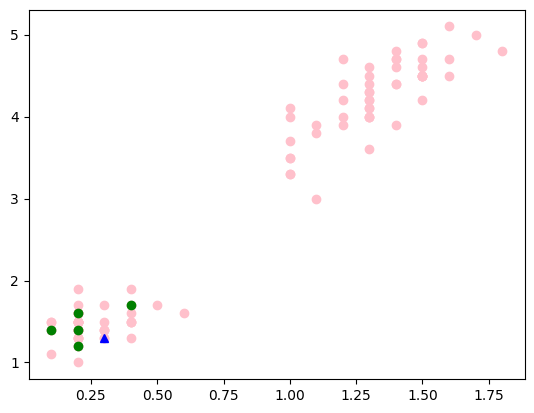

In [682]:
plt.scatter(iris_petal['petal.width'],iris_petal['petal.length'], color = 'pink')
plt.plot(iris_petal.iloc[number,1], iris_petal.iloc[number,0], 'b^')

plt.scatter(iris_petal.iloc[neighbors,1], iris_petal.iloc[neighbors,0], color = 'green')

plt.show()

# [7] 피쳐 스케일링

In [683]:
from sklearn.preprocessing import MinMaxScaler

In [684]:
mm_scaler = MinMaxScaler()

In [685]:
mm_scaler.fit(x_train)

MinMaxScaler()

In [686]:
mm_scaler.min_, mm_scaler.data_min_

(array([-0.24390244, -0.05882353]), array([1. , 0.1]))

In [687]:
mm_scaler.scale_, mm_scaler.data_max_

(array([0.24390244, 0.58823529]), array([5.1, 1.8]))

In [688]:
x_train_scaled = mm_scaler.transform(x_train)
x_train_scaled.shape

(80, 2)

In [689]:
x_test_scaled = mm_scaler.transform(x_test)
x_test_scaled.shape

(20, 2)

In [690]:
model_scaled = KNeighborsClassifier()

In [691]:
model_scaled.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [692]:
model_scaled.score(x_train_scaled, y_train)

1.0

In [693]:
model_scaled.score(x_test_scaled, y_test)

1.0

In [694]:
number = random.randint(0,100)
number

4

In [695]:
pd.DataFrame(iris_petal.iloc[number]).transpose()

,petal.length,petal.width,code
4,1.4,0.2,1.0


In [696]:
type(pd.DataFrame(iris_petal.iloc[number,[0,1]]).transpose())

pandas.core.frame.DataFrame

In [697]:
test_data_scaled = mm_scaler.transform(pd.DataFrame(iris_petal.iloc[number,[0,1]]).transpose())
test_data_scaled

array([[0.09756098, 0.05882353]])

In [698]:
model.predict(test_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [699]:
distance, index = model.kneighbors(test_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [700]:
distance

array([[0.91341501, 1.00328436, 1.11144168, 1.21069831, 1.21069831]])

In [701]:
index

array([[15, 78, 68, 18,  4]])

In [702]:
neighbors_scaled = index.reshape(-1).tolist()
neighbors_scaled

[15, 78, 68, 18, 4]

In [703]:
x_train_scaled[neighbors_scaled]

array([[0.        , 0.05882353],
       [0.02439024, 0.        ],
       [0.04878049, 0.05882353],
       [0.07317073, 0.05882353],
       [0.07317073, 0.05882353]])

In [704]:
x_train_scaled[:,0]

array([0.97560976, 0.82926829, 0.17073171, 0.75609756, 0.07317073,
       0.09756098, 0.14634146, 0.63414634, 0.09756098, 0.85365854,
       0.70731707, 0.2195122 , 0.87804878, 0.95121951, 0.12195122,
       0.        , 0.12195122, 1.        , 0.07317073, 0.70731707,
       0.09756098, 0.73170732, 0.70731707, 0.82926829, 0.92682927,
       0.68292683, 0.07317073, 0.14634146, 0.73170732, 0.07317073,
       0.09756098, 0.12195122, 0.85365854, 0.92682927, 0.90243902,
       0.09756098, 0.14634146, 0.09756098, 0.90243902, 0.12195122,
       0.80487805, 0.09756098, 0.6097561 , 0.90243902, 0.56097561,
       0.87804878, 0.82926829, 0.90243902, 0.17073171, 0.7804878 ,
       0.14634146, 0.7804878 , 0.85365854, 0.09756098, 0.80487805,
       0.12195122, 0.09756098, 0.85365854, 0.12195122, 0.75609756,
       0.73170732, 0.85365854, 0.12195122, 0.14634146, 0.75609756,
       0.65853659, 0.17073171, 0.09756098, 0.04878049, 0.12195122,
       0.14634146, 0.85365854, 0.2195122 , 0.14634146, 0.12195

In [705]:
test_data_scaled.reshape(-1)

array([0.09756098, 0.05882353])

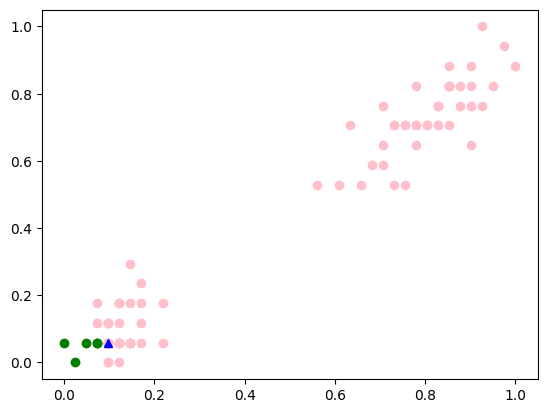

In [706]:
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1], color = 'pink')
plt.plot(test_data_scaled.reshape(-1)[0], test_data_scaled.reshape(-1)[1], 'b^')

plt.scatter(x_train_scaled[neighbors_scaled,0], x_train_scaled[neighbors_scaled,1], color = 'green')

plt.show()